In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
%matplotlib inline

In [4]:
a_df = pd.read_csv('appl_data_post_binning.csv')

In [5]:
a_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
a_df.shape

(307511, 61)

## 2. Analysis - Application data file

1. Identify the data imbalance
2. Divide the data into two sets based on TARGET column
3. Perform Univariate & Bivariate analysis
4. Identify the correlation

#### 2.1 Identifying the data imbalace against the TARGET columns. As 1 indicates the clients with delayed payments and 0 indicates otherwise.
- It is observed that almost 92% of the applications are with good history of payments. Whereas 8% are with payment difficulties. The data imbalance is around 11%.
- In the later sections we will try to identify the correlation of any attributes leading to either 1 or 0 of TARGET variable.

In [7]:
round(a_df.TARGET.value_counts(normalize=True) * 100, 2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

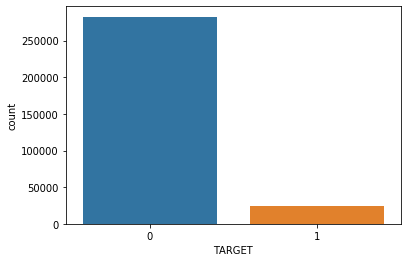

In [8]:
sns.countplot(x='TARGET',data=a_df)
plt.show()

In [9]:
round(len(a_df[a_df['TARGET'] == 0]) / len(a_df[a_df['TARGET'] == 1]),2)

11.39

### Identify the columns on which the further univariate and bivariate analysis will be performed and drop off all unnecessary columns

In [10]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Identify the correlation of continuous columns against TARGET column to get to understand which columns can be carried further for analysis

In [11]:
a_df.corr().TARGET.abs().sort_values().iloc[:-1].sort_values(ascending=False)

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
DAYS_BIRTH                     0.078239
AGE                            0.078234
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
AMT_CREDIT                     0.030369
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166
FLAG_PHONE                     0.023806
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
NO_OF_DOCUMENTS                0.017088


### Drop all unnecessary columns and carry only the required columns for analysis

In [12]:
a_df.drop('FLAG_OWN_CAR',axis=1,inplace=True)
a_df.drop('FLAG_OWN_REALTY',axis=1,inplace=True)
a_df.drop('CNT_CHILDREN',axis=1,inplace=True)
#a_df.drop('AMT_ANNUITY',axis=1,inplace=True)
a_df.drop('NAME_HOUSING_TYPE',axis=1,inplace=True)
a_df.drop('DAYS_BIRTH',axis=1,inplace=True)

a_df.drop('DAYS_EMPLOYED',axis=1,inplace=True)
a_df.drop('DAYS_REGISTRATION',axis=1,inplace=True)
a_df.drop('DAYS_ID_PUBLISH',axis=1,inplace=True)
a_df.drop('FLAG_MOBIL',axis=1,inplace=True)
a_df.drop('FLAG_EMP_PHONE',axis=1,inplace=True)

a_df.drop('FLAG_WORK_PHONE',axis=1,inplace=True)
a_df.drop('FLAG_CONT_MOBILE',axis=1,inplace=True)
#a_df.drop('CNT_FAM_MEMBERS',axis=1,inplace=True)
a_df.drop('REGION_RATING_CLIENT',axis=1,inplace=True)
a_df.drop('REGION_RATING_CLIENT_W_CITY',axis=1,inplace=True)

a_df.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
#a_df.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
a_df.drop('REG_REGION_NOT_LIVE_REGION',axis=1,inplace=True)
a_df.drop('LIVE_REGION_NOT_WORK_REGION',axis=1,inplace=True)
a_df.drop('REG_CITY_NOT_LIVE_CITY',axis=1,inplace=True)

a_df.drop('REG_CITY_NOT_WORK_CITY',axis=1,inplace=True)
a_df.drop('LIVE_CITY_NOT_WORK_CITY',axis=1,inplace=True)
a_df.drop('OBS_30_CNT_SOCIAL_CIRCLE',axis=1,inplace=True)
a_df.drop('DEF_30_CNT_SOCIAL_CIRCLE',axis=1,inplace=True)
a_df.drop('DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)

a_df.drop('AMT_REQ_CREDIT_BUREAU_HOUR',axis=1,inplace=True)
a_df.drop('AMT_REQ_CREDIT_BUREAU_DAY',axis=1,inplace=True)
a_df.drop('AMT_REQ_CREDIT_BUREAU_WEEK',axis=1,inplace=True)
a_df.drop('AMT_REQ_CREDIT_BUREAU_MON',axis=1,inplace=True)
a_df.drop('AMT_REQ_CREDIT_BUREAU_QRT',axis=1,inplace=True)

a_df.drop('AGE_CATEGORY',axis=1,inplace=True)
a_df.drop('REGION_POPULATION_RELATIVE',axis=1,inplace=True)
a_df.drop('REG_REGION_NOT_WORK_REGION',axis=1,inplace=True)
a_df.drop('CODE_GENDER',axis=1,inplace=True)

In [13]:
a_df.shape

(307511, 29)

In [14]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   AMT_INCOME_TOTAL            307511 non-null  float64
 4   AMT_CREDIT                  307511 non-null  float64
 5   AMT_ANNUITY                 307499 non-null  float64
 6   AMT_GOODS_PRICE             307233 non-null  float64
 7   NAME_TYPE_SUITE             306219 non-null  object 
 8   NAME_INCOME_TYPE            307511 non-null  object 
 9   NAME_EDUCATION_TYPE         307511 non-null  object 
 10  NAME_FAMILY_STATUS          307511 non-null  object 
 11  FLAG_PHONE                  307511 non-null  int64  
 12  FLAG_EMAIL                  307511 non-null  int64  
 13  OCCUPATION_TYP

### 2.2 Divide the data  into two dataframes with respect to TARGET column

In [15]:
a0_df = a_df[a_df.TARGET == 0]
a1_df = a_df[a_df.TARGET == 1]

In [16]:
a0_df.shape

(282686, 29)

In [17]:
a0_df.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NO_OF_DOCUMENTS,AGE
count,282686.000000,282686.0,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282684.000000,282686.000000,2.820780e+05,227398.000000,281701.000000,281701.000000,245459.000000,282686.000000,282686.000000
mean,278244.744536,0.0,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.284238,0.056840,2.150154,12.086807,5.234787e-01,0.520969,1.398923,0.096688,1.889199,0.928369,43.713123
std,102825.776954,0.0,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.451051,0.231538,0.906984,3.263173,1.862767e-01,0.190465,2.381793,0.355771,1.863376,0.349077,11.955290
min,100003.000000,0.0,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189103.250000,0.0,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.000000,0.000000,2.000000,10.000000,4.097866e-01,0.385915,0.000000,0.000000,0.000000,1.000000,34.000000
50%,278362.500000,0.0,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.000000,0.000000,2.000000,12.000000,5.739047e-01,0.546023,0.000000,0.000000,1.000000,1.000000,43.000000
75%,367241.500000,0.0,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,1.000000,0.000000,3.000000,14.000000,6.677051e-01,0.673830,2.000000,0.000000,3.000000,1.000000,54.000000
max,456255.000000,0.0,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,1.000000,1.000000,20.000000,23.000000,8.549997e-01,0.893976,344.000000,24.000000,25.000000,3.000000,69.000000


In [18]:
a1_df.shape

(24825, 29)

In [19]:
a1_df.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NO_OF_DOCUMENTS,AGE
count,24825.000000,24825.0,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000,24773.000000,19148.000000,24789.000000,24789.000000,20533.000000,24825.000000,24825.000000
mean,277449.167936,1.0,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.244955,0.055347,2.181269,11.797100,0.410935,0.390717,1.477672,0.138247,2.028783,0.949970,40.279960
std,102383.123458,0.0,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.430069,0.228662,0.951327,3.284299,0.213107,0.205810,2.355908,0.427645,1.934063,0.284259,11.484458
min,100002.000000,1.0,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000,21.000000
25%,189555.000000,1.0,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.000000,0.000000,2.000000,10.000000,0.238568,0.223831,0.000000,0.000000,1.000000,1.000000,31.000000
50%,276291.000000,1.0,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.000000,0.000000,2.000000,12.000000,0.440381,0.379100,0.000000,0.000000,2.000000,1.000000,39.000000
75%,366050.000000,1.0,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.000000,0.000000,3.000000,14.000000,0.594190,0.553165,2.000000,0.000000,3.000000,1.000000,49.000000
max,456254.000000,1.0,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,1.000000,1.000000,13.000000,23.000000,0.811870,0.896010,29.000000,5.000000,22.000000,4.000000,68.000000


### Identify the set of categorical and continuous variables for analysis

In [20]:
list(set(a_df.dtypes.tolist()))
a_df_cat = a_df.select_dtypes(include = ['O'])

In [21]:
a_df_cat.columns

Index(['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'AMT_INCOME_SECTION', 'AMT_GOODS_SECTION',
       'EMPLOYMENT_EXP', 'EXT_SOURCE_SCORE', 'REGION_POPULATION_CAT'],
      dtype='object')

In [22]:
list(set(a_df.dtypes.tolist()))
a_df_num = a_df.select_dtypes(include = ['int64','float64'])

In [23]:
a_df_num.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NO_OF_DOCUMENTS', 'AGE'],
      dtype='object')

### 2.3.1 Univariate analysis of all continuous variables againt the TARGET variable.

<Figure size 432x288 with 0 Axes>

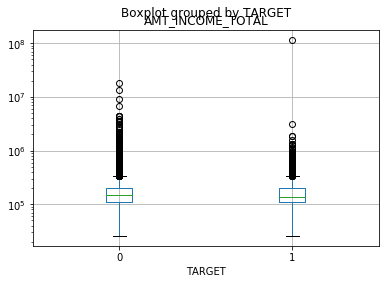

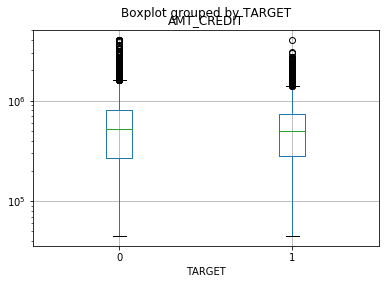

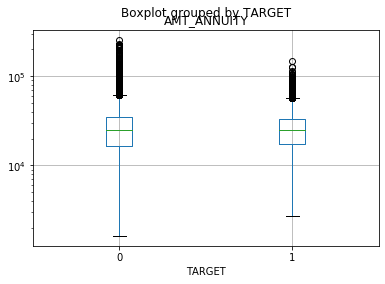

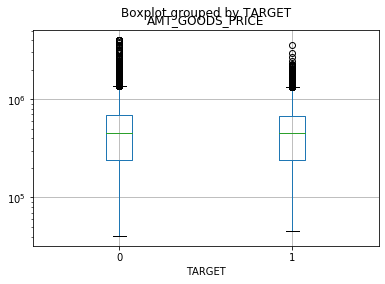

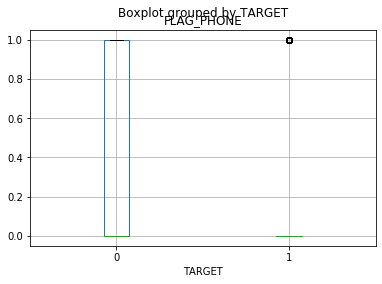

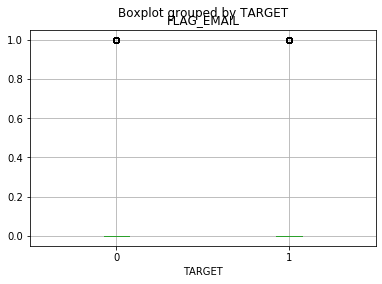

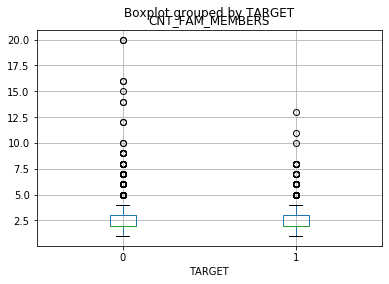

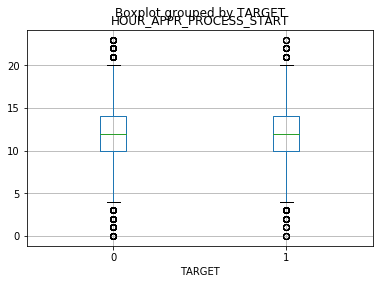

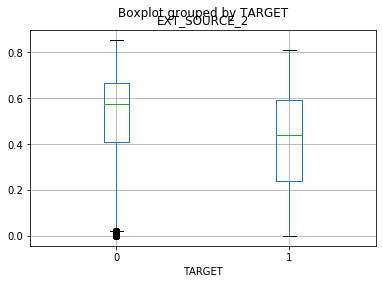

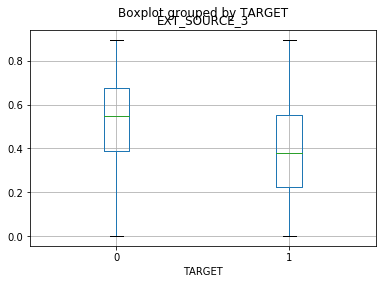

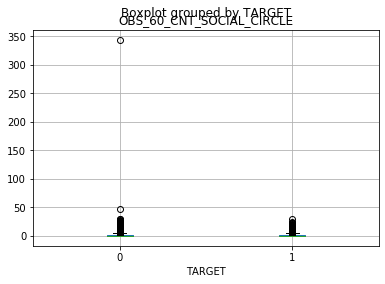

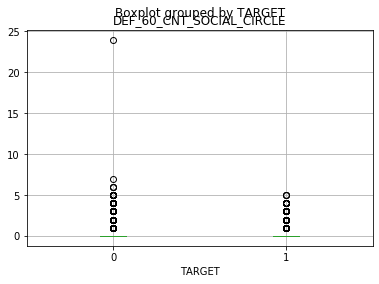

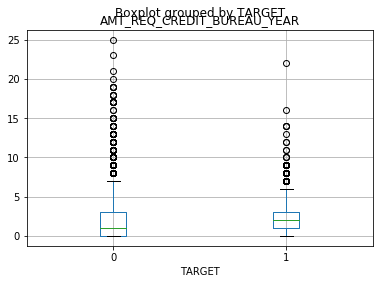

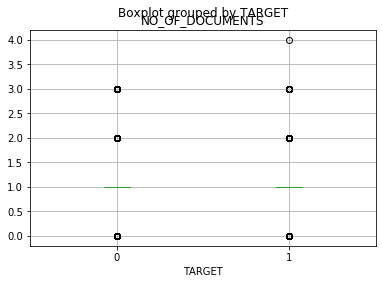

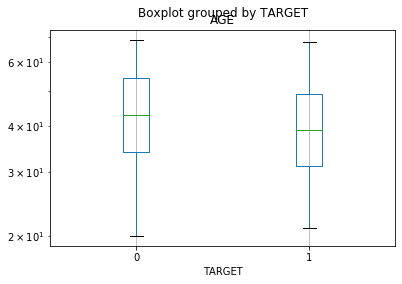

In [24]:
logScaleCols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
plt.figure(figsize=(6,4))
for i in range(2,len(a_df_num.columns)):
    #plt.subplot(8,2,i-1)
    a_df.boxplot(column=a_df_num.columns[i],by='TARGET')
    if a_df_num.columns[i] in logScaleCols:
        plt.yscale('log')
    plt.show()

### Observations out of Univariate analysis of continuous variables
#### Only the below variables are observed with some difference between the TARGET values 0 and 1. Rest all continuous columns seems to be very similar against TARGET values.
- EXT_SOURCE_2 - The score seems to be higher for the applications with TARGET value 0 compared to the TARGET  value 1.
- EXT_SOURCE_3 - The score seems to be higher for the applications with TARGET value 0 compared to the TARGET  value 1.
- AMT_REQ_CREDIT_BUREAU_YEAR - The value seems to be lower for the applications with TARGET value 0 compared to the TARGET  value 1.

### 2.3.2 Univariate analysis of all continuous variables againt the TARGET variable.

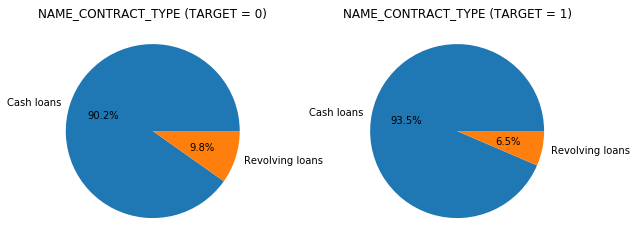

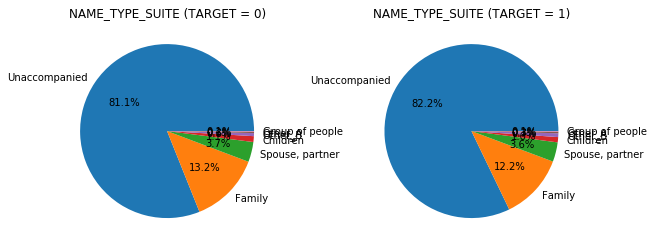

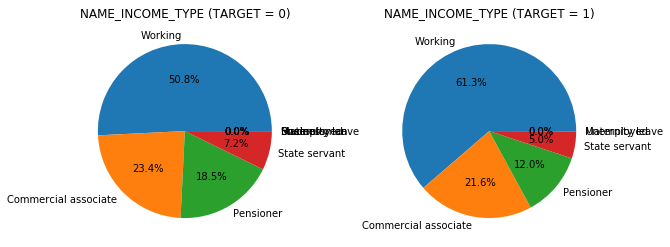

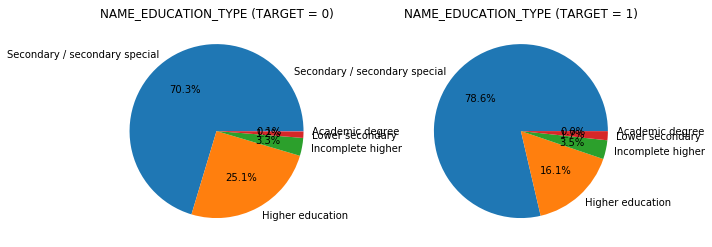

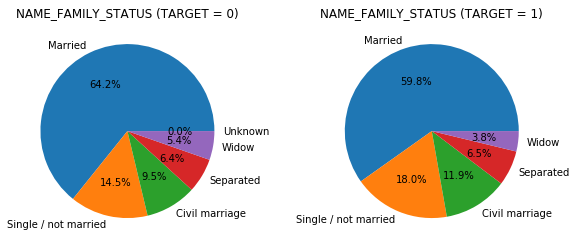

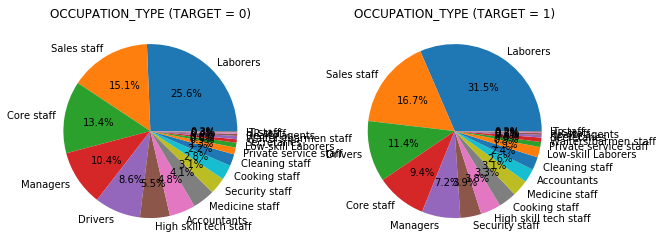

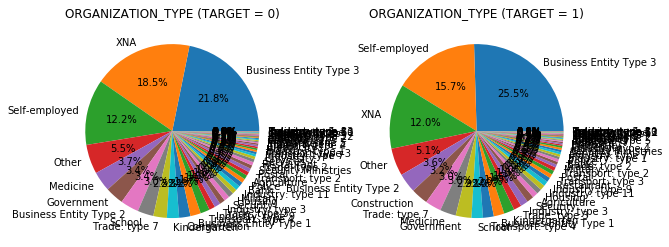

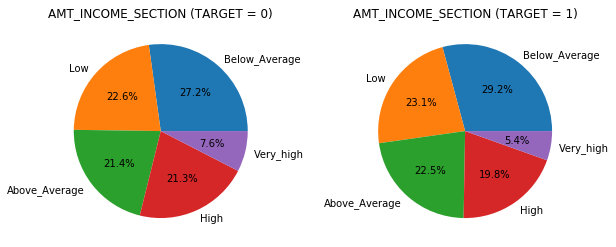

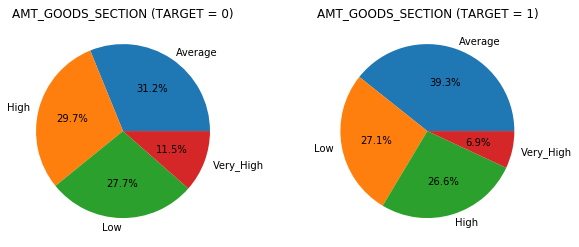

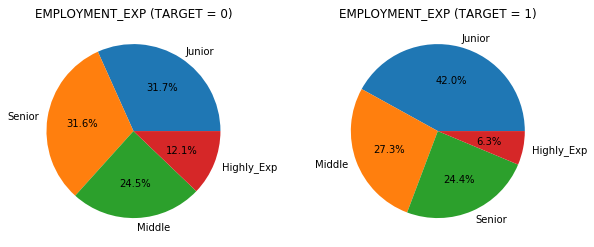

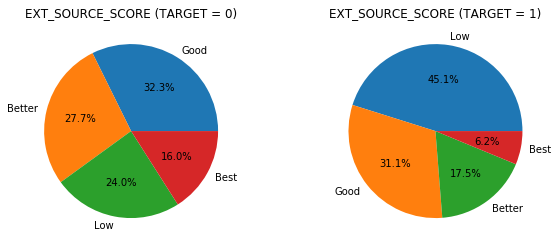

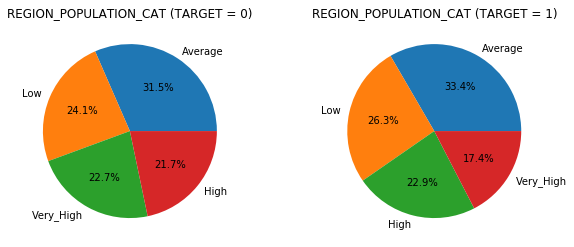

In [25]:
for i in range(len(a_df_cat.columns)):
    plt.figure(figsize=(10,4))
    j = 0
    plt.subplot(1,2,j+1)
    title = a_df_cat.columns[i]+' (TARGET = 0)'
    plt.title(title)
    plt.pie(a0_df[a_df_cat.columns[i]].value_counts().values, labels=a0_df[a_df_cat.columns[i]].value_counts().index, autopct='%1.1f%%')

    plt.subplot(1,2,j+2)
    title = a_df_cat.columns[i]+' (TARGET = 1)'
    plt.title(title)
    plt.pie(a1_df[a_df_cat.columns[i]].value_counts().values, labels=a1_df[a_df_cat.columns[i]].value_counts().index, autopct='%1.1f%%')

    plt.show()

### Observations out of Univariate analysis of categorical variables
#### Only the below variables are observed with some difference between the TARGET values 0 and 1. Rest all categorical columns seems to be very similar against TARGET values.
- NAME_EDUCATION_TYPE - Candidates with Higher Education observed with more applications with TARGET value 0 comapred to TARGET value 1.
- OCCUPATION_TYPE - Laborers seems to have more applications with TARGET value 1 compared to value 0.
- AMT_GOODS_SECTION - The applications with average goods price (2,50,000 - 5,00,000) seems to tend more towards TARGET value 1. The application with Very High goods price seems to tend more towards TARGET value 0.
- EMPLOYMENT_EXP - Junior employees (applications with less DAYS_EMPLOYED) tend to have more applications with TARGET value 1 and Highly Experienced employees tend to have more applications with TARGET value 0.
- EXT_SOURCE_SCORE - It clealy shows that as good the score, the applications more likely to have TARGET value 0.

### 2.4 Identifying the correlation between variables in each of the dataframe with TARGET value 0 and 1

In [26]:
def plotCorrelation(df):
    corr = df.corr()
    corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    corrdf = corr.unstack().reset_index()
    corrdf.columns = ['Variable 1', 'Variable 2', 'Correlation']
    corrdf.dropna(subset = ['Correlation'], inplace = True)
    corrdf['Correlation'] = round(corrdf['Correlation'], 2)
    # Since we see correlation as an absolute value, we are converting it into absolute value
    corrdf['Correlation_Abs'] = corrdf['Correlation'].abs()
    corrdf = corrdf.sort_values(by = 'Correlation_Abs', ascending = False)
    return corrdf.head(10)

#### Identify top 10 variables with high correlation in dataframe with TARGET value 0.

In [27]:
plotCorrelation(a0_df)

,Variable 1,Variable 2,Correlation,Correlation_Abs
88,AMT_GOODS_PRICE,AMT_CREDIT,0.99,0.99
89,AMT_GOODS_PRICE,AMT_ANNUITY,0.78,0.78
71,AMT_ANNUITY,AMT_CREDIT,0.77,0.77
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42,0.42
87,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35,0.35
53,AMT_CREDIT,AMT_INCOME_TOTAL,0.34,0.34
280,AGE,CNT_FAM_MEMBERS,-0.29,0.29
233,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.25,0.25
258,NO_OF_DOCUMENTS,AMT_CREDIT,0.21,0.21
283,AGE,EXT_SOURCE_3,0.20,0.20


#### Identify top 10 variables with high correlation in dataframe with TARGET value 1.

In [28]:
plotCorrelation(a1_df)

,Variable 1,Variable 2,Correlation,Correlation_Abs
88,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
89,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
71,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
233,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.26,0.26
280,AGE,CNT_FAM_MEMBERS,-0.20,0.20
259,NO_OF_DOCUMENTS,AMT_ANNUITY,0.20,0.20
258,NO_OF_DOCUMENTS,AMT_CREDIT,0.17,0.17
283,AGE,EXT_SOURCE_3,0.17,0.17
277,AGE,AMT_GOODS_PRICE,0.14,0.14
275,AGE,AMT_CREDIT,0.14,0.14


### It is observed that the correlation is staying similar for both the dataframes with TARGET value 0 and 1 having the top three are same variables.

### However, on the combined dataset correlation it is observed that, the below columns in the order displayed showcases some correlation.
- External Source is a very reliable column to depend on.
- Age is good factor to decide whether the applicant will have payment difficulties not.

In [29]:
a_df.corr().TARGET.abs().sort_values(ascending=False).iloc[:-1]

TARGET                        1.000000
EXT_SOURCE_3                  0.178919
EXT_SOURCE_2                  0.160472
AGE                           0.078234
AMT_GOODS_PRICE               0.039645
DEF_60_CNT_SOCIAL_CIRCLE      0.031276
AMT_CREDIT                    0.030369
HOUR_APPR_PROCESS_START       0.024166
FLAG_PHONE                    0.023806
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
NO_OF_DOCUMENTS               0.017088
AMT_ANNUITY                   0.012817
CNT_FAM_MEMBERS               0.009308
OBS_60_CNT_SOCIAL_CIRCLE      0.009022
AMT_INCOME_TOTAL              0.003982
SK_ID_CURR                    0.002108
Name: TARGET, dtype: float64

## Bivariate analysis on the application data dataframe
### Bivariate analysis of some of the limited range continuous variables against TARGET column

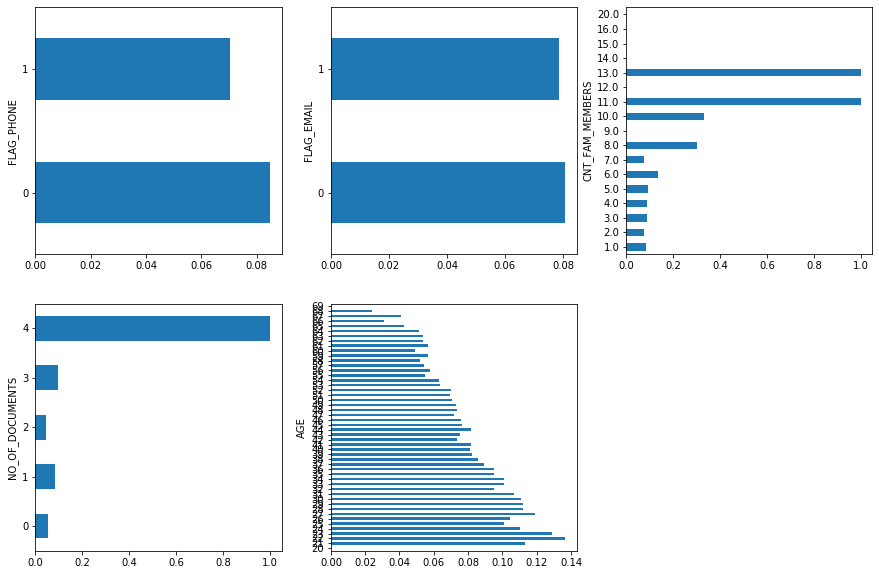

In [30]:
colsBarPlot = ['FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','NO_OF_DOCUMENTS','AGE']
plt.figure(figsize=(15,10))
for i in range(len(colsBarPlot)):
    plt.subplot(2,3,i+1)
    catGrp = a_df.groupby(colsBarPlot[i])
    catGrp.TARGET.mean().plot.barh()
plt.show()

### With the above bivariate analysis of some of the continuous variables, it is quite clear that:
- Age is direclty proportional to the applicant being loyal to payments. Younger people have more chances of delayed payments and older poeple have very less chance.
- Count of family members is indirectly proportional to being loyal to payments. As lesser the count of family members, as good to expect safe and ontime payments.

### Bivariate analysis of categorical variables against TARGET column

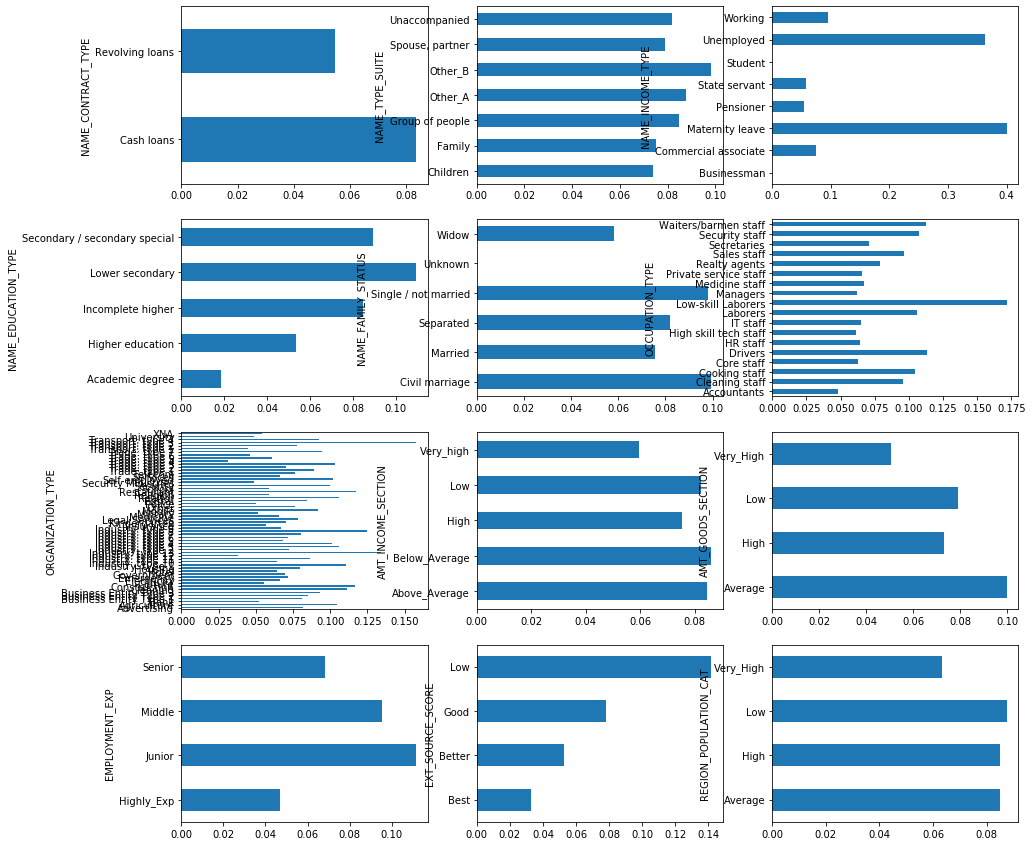

In [31]:
plt.figure(figsize=(15,15))
for i in range(len(a_df_cat.columns)):
    plt.subplot(4,3,i+1)
    catGrp = a_df.groupby(a_df_cat.columns[i])
    catGrp.TARGET.mean().plot.barh()
plt.show()

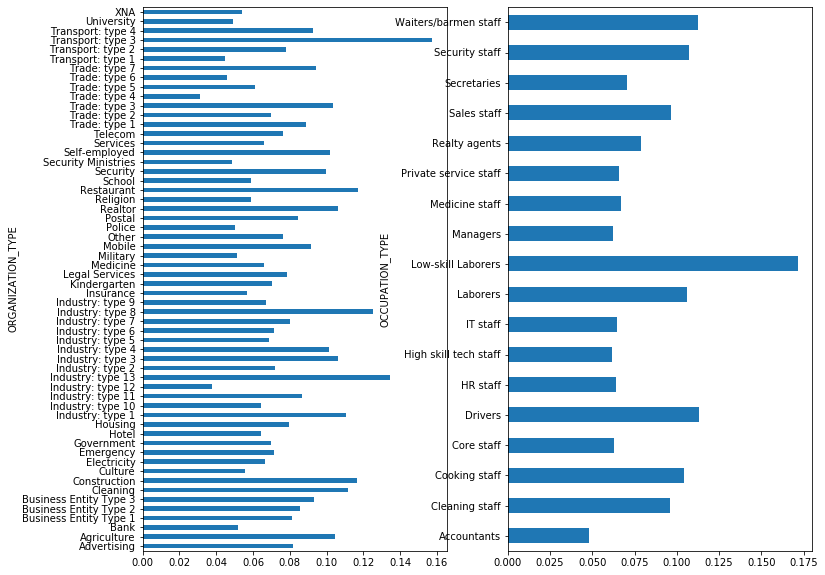

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(121)
contract_grp = a_df.groupby('ORGANIZATION_TYPE')
contract_grp.TARGET.mean().plot.barh()
plt.subplot(122)
occupation_grp = a_df.groupby('OCCUPATION_TYPE')
occupation_grp.TARGET.mean().plot.barh()
plt.show()

### With the above bivariate analysis of some of the categorical variables, following observations can be made:
 - Very clearly Unemployed & Maternity Leave applicants are having very higher chance of falling into payment difficulties.
 - Cash loans are more prone to payment difficulties compared to Revolving loans.
 - As higher the applicant is educated there is less chance of falling into payment difficulties.
 - External Source Score clearly a reliable value. As better the score, there is more not likely to fall into payment difficulties.
 - Applications from OCCUPATION_TYPE of 'Low-skill Laborers' seems falling more into payment difficulties. 

#### Store the dataframe for further analysis with previous application data

In [33]:
a_df.to_csv('appl_data_final.csv')

# 3. Analysis - Previous Application data file
1. Read the previous application datafile
2. Perform initial checks.
3. Drop all unnecessary columns for analysis
4. Perform univariate analysis
5. Merge with application data which was analysed before
6. Identify continuous and categorical columns and perform bivariate analysis accordingly

In [34]:
p_df = pd.read_csv('previous_application.csv')

In [35]:
p_df.shape

(1670214, 37)

In [36]:
p_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [37]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [38]:
p_df.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
p_df.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
p_df.drop('NAME_CASH_LOAN_PURPOSE',axis=1,inplace=True)
p_df.drop('NAME_PORTFOLIO',axis=1,inplace=True)
p_df.drop('NAME_PRODUCT_TYPE',axis=1,inplace=True)

p_df.drop('RATE_INTEREST_PRIMARY',axis=1,inplace=True)
p_df.drop('RATE_INTEREST_PRIVILEGED',axis=1,inplace=True)
p_df.drop('DAYS_FIRST_DRAWING',axis=1,inplace=True)
p_df.drop('DAYS_FIRST_DUE',axis=1,inplace=True)
p_df.drop('DAYS_LAST_DUE_1ST_VERSION',axis=1,inplace=True)

p_df.drop('DAYS_LAST_DUE',axis=1,inplace=True)
p_df.drop('DAYS_TERMINATION',axis=1,inplace=True)
p_df.drop('SELLERPLACE_AREA',axis=1,inplace=True)
p_df.drop('FLAG_LAST_APPL_PER_CONTRACT',axis=1,inplace=True)

### Perform univariate analysis on some of the columns in previous applications data file

In [39]:
p_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

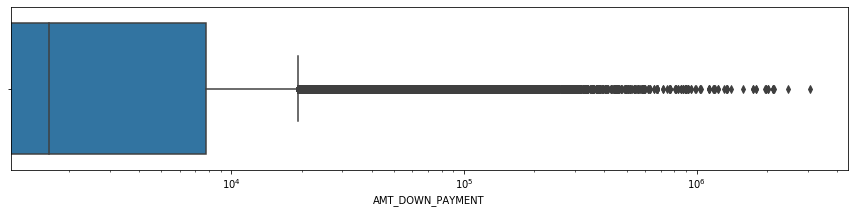

In [40]:
plt.figure(figsize=(15,3))
sns.boxplot(p_df.AMT_DOWN_PAYMENT)
plt.xscale('log')
plt.show()

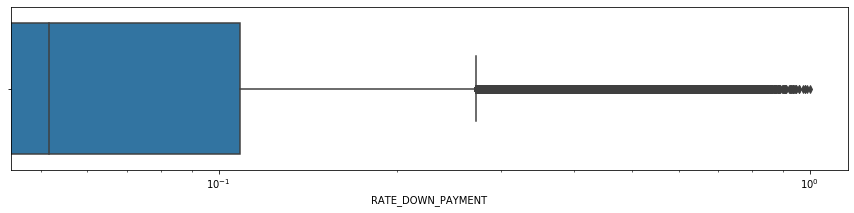

In [41]:
plt.figure(figsize=(15,3))
sns.boxplot(p_df.RATE_DOWN_PAYMENT)
plt.xscale('log')
plt.show()

In [42]:
p_df.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

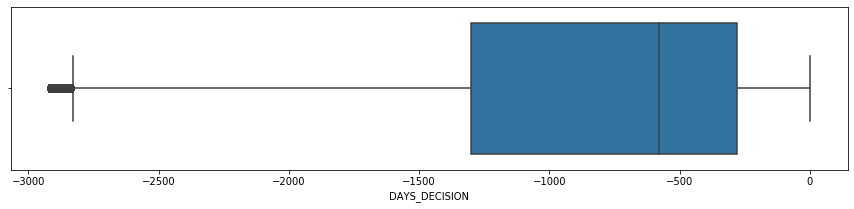

In [43]:
plt.figure(figsize=(15,3))
sns.boxplot(p_df.DAYS_DECISION)
plt.show()

In [44]:
p_df.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [45]:
p_df.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [46]:
p_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [47]:
p_df.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [48]:
p_df.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [49]:
p_df.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [50]:
p_df.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

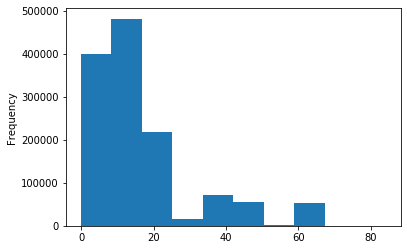

In [51]:
p_df.CNT_PAYMENT.plot.hist()
plt.show()

In [52]:
p_df.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [53]:
p_df.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

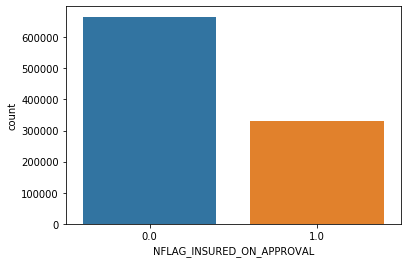

In [54]:
sns.countplot(p_df.NFLAG_INSURED_ON_APPROVAL)
plt.show()

In [55]:
p_df.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

### Observations out of univariate analysis
- Almost all continuous variables has some outliers
- NFLAG_INSURED_ON_APPROVAL - Comparatively less no.of applications has insurance. Need to determine whether this plays a role in final status
- All the below columns has NA or Garbage values huge in numbers:
    1. NAME_PAYMENT_TYPE
    2. NAME_YIELD_GROUP
    3. NAME_SELLER_INDUSTRY
    4. NAME_GOODS_CATEGORY
    5. CODE_REJECT_REASON

In [56]:
a_df.shape

(307511, 29)

In [57]:
p_df.shape

(1670214, 23)

### Merge both the previous and current application data for further analysis

In [58]:
ap_df = pd.merge(left=p_df,right=a_df,how='left',on='SK_ID_CURR',suffixes=('_Prev','_Current'))

In [59]:
ap_df.shape

(1670214, 51)

### Identify the continuous and categorical columns in the combined dataframe for further bivariate analysis.

In [60]:
list(set(a_df.dtypes.tolist()))
ap_df_cat = ap_df.select_dtypes(include = ['O'])
ap_df_num = ap_df.select_dtypes(include = ['int64','float64'])

In [61]:
len(ap_df_cat.columns)

23

In [62]:
ap_df_cat.columns

Index(['NAME_CONTRACT_TYPE_Prev', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_Prev', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NAME_CONTRACT_TYPE_Current',
       'NAME_TYPE_SUITE_Current', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'AMT_INCOME_SECTION', 'AMT_GOODS_SECTION', 'EMPLOYMENT_EXP',
       'EXT_SOURCE_SCORE', 'REGION_POPULATION_CAT'],
      dtype='object')

In [63]:
len(ap_df_num.columns)

28

In [64]:
ap_df_num.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY_Prev', 'AMT_APPLICATION',
       'AMT_CREDIT_Prev', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_Prev',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'CNT_PAYMENT', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_Current', 'AMT_ANNUITY_Current',
       'AMT_GOODS_PRICE_Current', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NO_OF_DOCUMENTS', 'AGE'],
      dtype='object')

### Plot the bivariate analysis of all continuous variables against NAME_CONTRACT_STATUS Column

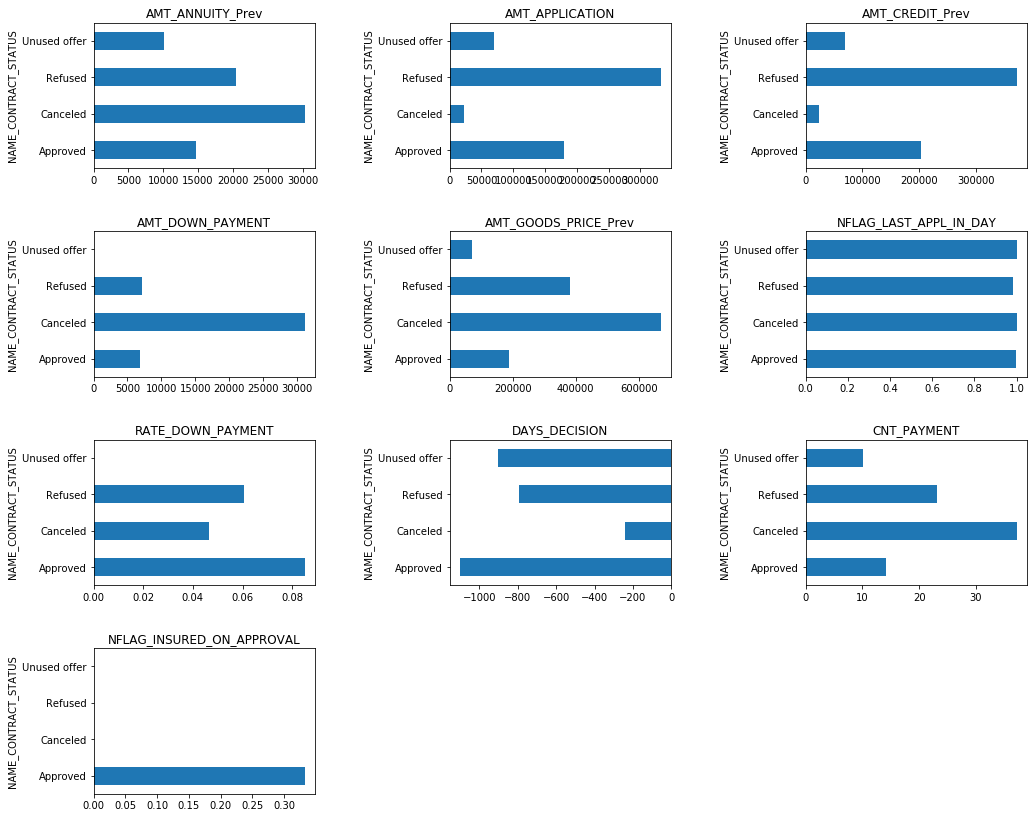

In [65]:
plt.figure(figsize=(15,12))
for i in range(2,12):
    plt.subplot(4,3,i-1)
    plt.title(ap_df_num.columns[i])
    contractStatusGrp = ap_df.groupby('NAME_CONTRACT_STATUS')
    contractStatusGrp[ap_df_num.columns[i]].mean().plot.barh()

plt.tight_layout(pad=3.0)
plt.show()

### Below are the observations out of above bivariate analysis of continuous variables
- AMT_ANNUITY - Higher Annuity amounts leads to cancellation or refeusal of applications.
- AMT_APPLICATION - Higher amount applications leads to refusal of applications.
- AMT_CREDIT - Higher amount credits leads to refusal of applications.
- AMT_GOODS_PRICE - Higher goods price leads to cancellation or refeusal of applications.
- AMT_DOWN_PAYMENT - It is observed that applications with  huge downpayemts are more to get cacelled.
- RATE_DOWN_PAYMENT - Higher downpayemt rate leads to application approval.
- DAYS_DECISION - As high the number it may lead to approval and as low the number it may  lead to cancellation.
- CNT_PAYMENT - As minimum the term of previous application, it is high likely to get approval. As high it is, it may lead to cancellation.
- NFLAG_INSURED_ON_APPROVAL - Applications without insurance are high likely not to get approved.

### Plot the bivariate analysis of all categorical variables against NAME_CONTRACT_STATUS Column

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

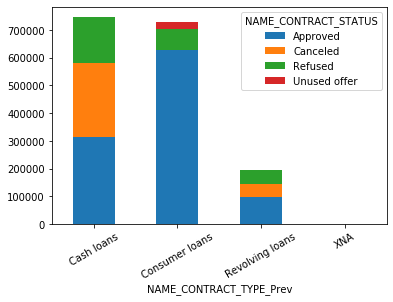

In [66]:
pd.crosstab(ap_df['NAME_CONTRACT_TYPE_Prev'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

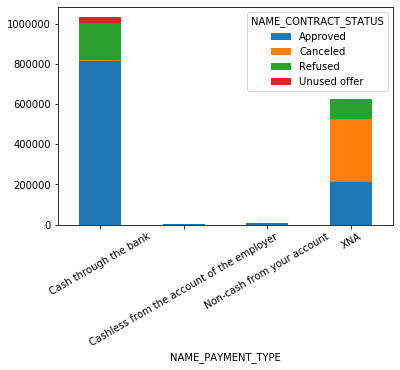

In [67]:
pd.crosstab(ap_df['NAME_PAYMENT_TYPE'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

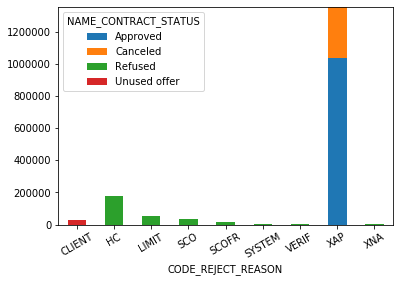

In [68]:
pd.crosstab(ap_df['CODE_REJECT_REASON'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

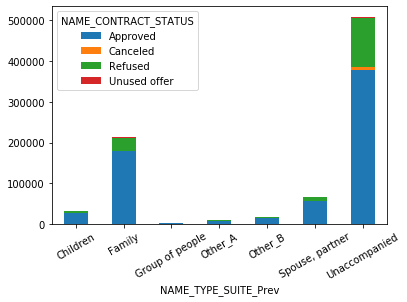

In [69]:
pd.crosstab(ap_df['NAME_TYPE_SUITE_Prev'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

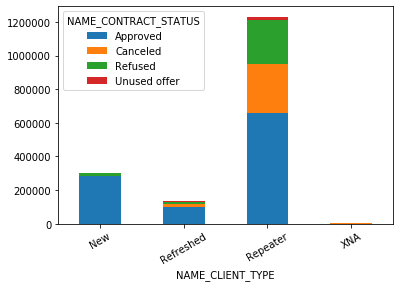

In [70]:
pd.crosstab(ap_df['NAME_CLIENT_TYPE'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

<Figure size 5000x5000 with 0 Axes>

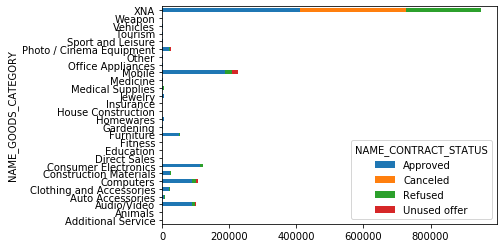

In [71]:
plt.figure(figsize=(10,10),dpi=500)
pd.crosstab(ap_df['NAME_GOODS_CATEGORY'],ap_df['NAME_CONTRACT_STATUS']).plot.barh(stacked=True)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

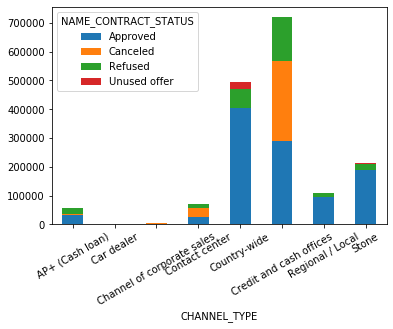

In [72]:
pd.crosstab(ap_df['CHANNEL_TYPE'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

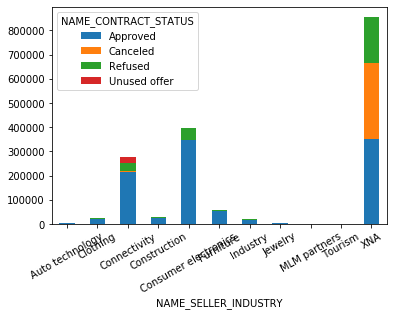

In [73]:
pd.crosstab(ap_df['NAME_SELLER_INDUSTRY'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

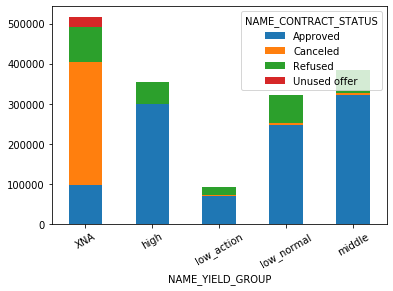

In [74]:
pd.crosstab(ap_df['NAME_YIELD_GROUP'],ap_df['NAME_CONTRACT_STATUS']).plot.bar(stacked=True)
plt.xticks(rotation = 30)

### Below are the observations out of above bivariate analysis of categorical variables
- NAME_CONTRACT_TYPE - Cash loans & revolving loans are more set to get cancelled or refused compared to the consumer loans which has higher chance of getting approved.
- NAME_PAYMENT_TYPE - High chance of getting cancelled where there is no record of payment type.
- NAME_TYPE_SUITE - Good chace of getting application cancelled when the applicant is unaccompanied.
- NAME_CLIENT_TYPE - Repeaters are more likely to get their applications cancelled or refused compared to New & Refreshed.
- NAME_GOODS_CATEGORY - More likely to get cacelled / refused in case the goods type is not mentioned.
- CHANNEL_TYPE - Country-wide channel has more cancellation and refusal applications compared to any other channel.
- NAME_SELLER_INDUSTRY - More likely to get cacelled / refused in case of seller industry name is not available.
- NAME_YIELD_GROUP - High likely to get cancelled if the grouped rate interest amount is not available.